# Hyper-parameters selection for random forest


In [1]:
import os
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# paths the features
FEATURES_DIR = "../../features/"
MODELS_DIR = "../../models/"

### Load Data


In [3]:
names = os.listdir(FEATURES_DIR)
print(names)
data_list = []
data_list_name = []

for name in names:
    data = np.load(FEATURES_DIR + name)
    X = data["X"]
    y = data["y"].reshape(-1, 1)
    filename = data["filename"].reshape(-1, 1)
    data = np.concatenate((X, y), axis=1)
    data_name = np.concatenate((data, filename), axis=1)
    data_list.append(data)
    data_list_name.append(data_name)

# create the full data matrix
data = np.concatenate(data_list, axis=0)
data_name = np.concatenate(
    data_list_name, axis=0
)  # data with the index of the filename in the last column

# split the data in testing and training
X_train, X_test, y_train, y_test = train_test_split(
    data[:, :-1], data[:, -1], test_size=0.2, random_state=42
)

['extrahls_1_mix.npz', 'extrastoles_1_mix.npz', 'artifacts_1_mix.npz', 'murmurs_1_mix.npz', 'normals_1_mix.npz']


### Fit Model


Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
[CV 2/3] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.861 total time=   0.1s
[CV 1/3] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.850 total time=   0.2s
[CV 3/3] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.853 total time=   0.2s
[CV 3/3] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.867 total time=   0.4s
[CV 2/3] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.861 total time=   0.4s
[CV 1/3] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.862 total time=   0.4s
[CV 1/3] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples

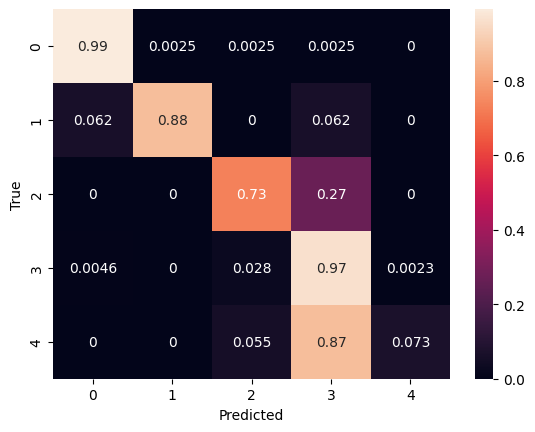

In [10]:
# Parameter grid for Random Forest
param_grid = {
    "n_estimators": [10, 20, 50, 100],  # number of trees in the forest
    "class_weight": [
        "balanced",
        None,
    ],  # "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
    "max_depth": [
        None,
        5,
        10,
        20,
        30,
        50,
    ],  # maximum number of levels in each tree
    "min_samples_split": [
        2,
        3,
        4,
        5,
        10,
    ],  # minimum number of samples required to split a node
    "min_samples_leaf": [
        1,
        2,
        3,
        4,
        7,
        10,
    ],  # minimum number of samples required at each leaf node
}

rf = RandomForestClassifier(random_state=42)


# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    verbose=5,
    n_jobs=-1,
)

grid_search.fit(X_train, y_train)


# Best parameters found by Grid Search
print("Best parameters:", grid_search.best_params_)


# predict the test set
y_pred = grid_search.best_estimator_.predict(X_test)
print(f"Test report: \n{classification_report(y_test, y_pred)}")

# save the model
joblib.dump(rf, MODELS_DIR + "rf_best.gz")

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
row_sums = cm.sum(axis=1)
cm_percent = cm / row_sums[:, np.newaxis] * 100

sns.heatmap(cm_percent, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()